In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("Dataset.csv")
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity'>

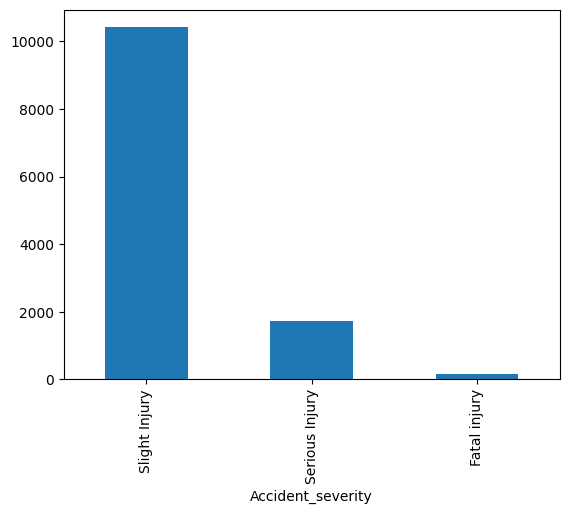

In [7]:
print(data['Accident_severity'].value_counts())
data['Accident_severity'].value_counts().plot(kind='bar')

Axes(0.125,0.11;0.775x0.77)


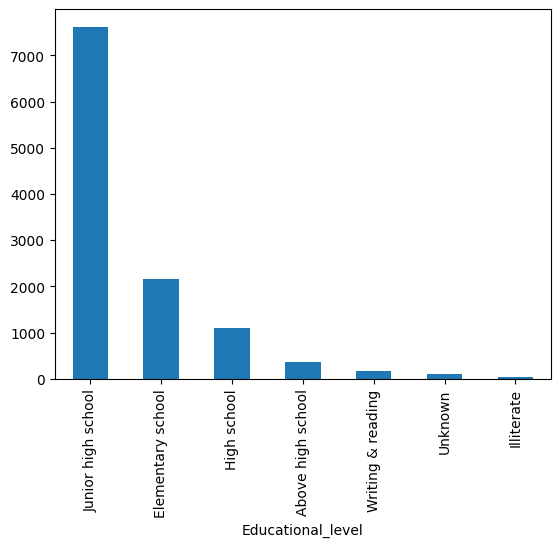

In [8]:
print(data['Educational_level'].value_counts().plot(kind='bar'))

E:\Installed\python\Lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
E:\Installed\python\Lib\site-packages\dabl\preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series)
E:\Installed\python\Lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
E:\Installed\python\Lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `date

Target looks like classification
Showing only top 10 of 31 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 [array([[<Axes: xlabel='Number_of_casualties', ylabel='Number_of_casualties'>]],
        dtype=object)],
 array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
         <Axes: title={'center': 'Types_of_Junction'}>,
         <Axes: title={'center': 'Age_band_of_driver'}>,
         <Axes: title={'center': 'Weather_conditions'}>,
         <Axes: title={'center': 'Type_of_vehicle'}>],
        [<Axes: title={'center': 'Area_accident_occured'}>,
         <Axes: title={'center': 'Cause_of_accident'}>,
         <Axes: title={'center': 'Day_of_week'}>,
         <Axes: title={'center': 'Light_conditions'}>,
         <Axes: title={'center': 'Type_of_collision'}>]], dtype=object)]

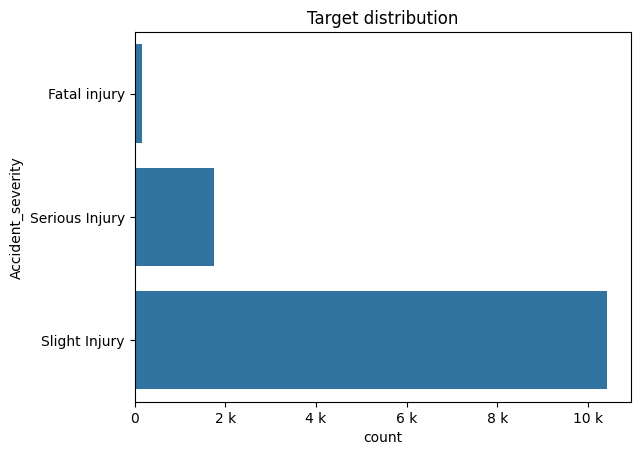

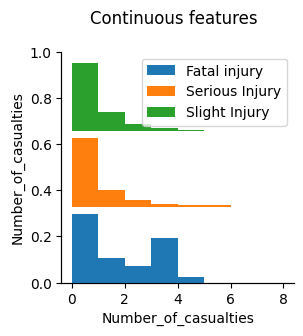

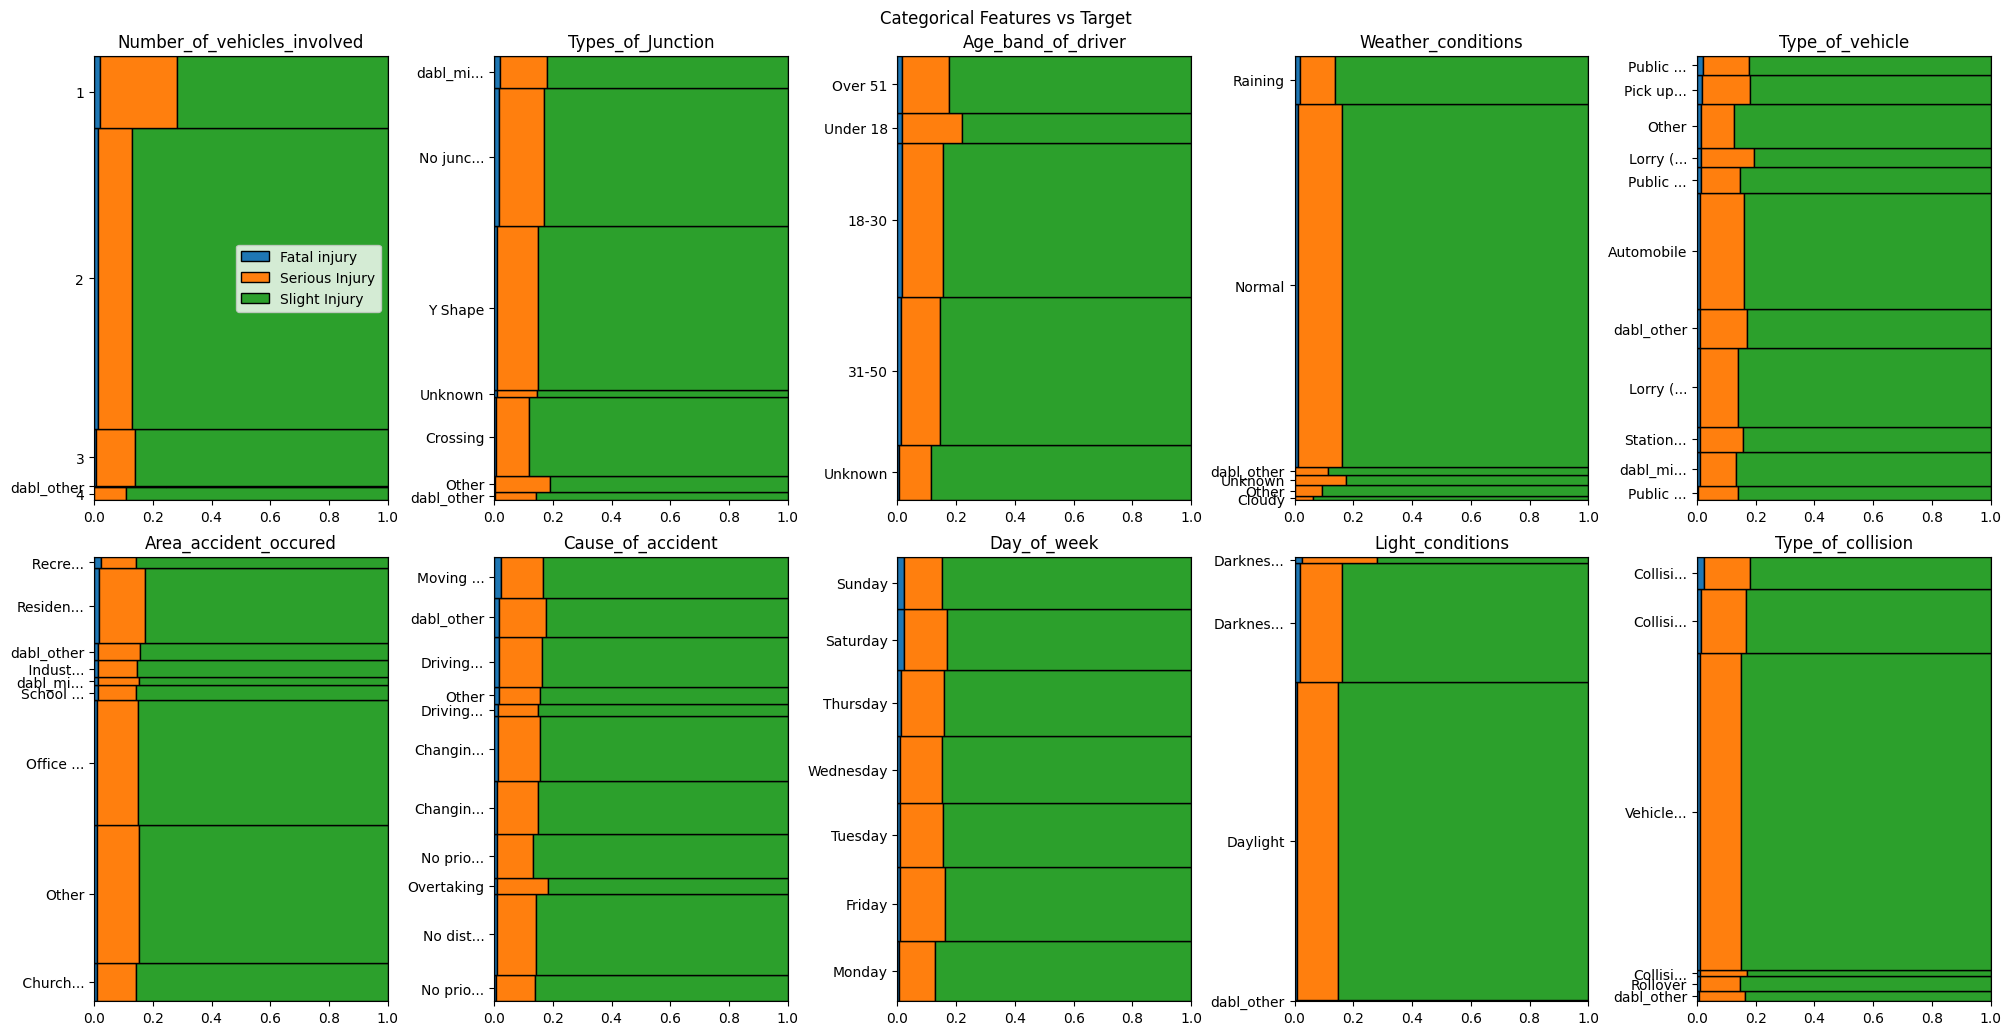

In [9]:
# Visualizing dataset using dabl library
# From our analysis so far, we can derive the following insights:
#More the Number of casualties, the higher the chances of fatal injuries at the accident site
#More the vehicles involved higher the chances of Serious injury
#Light_conditions being darkness can cause higher serious injury
#Data is highly imbalanced
#Features like area_accident_occured, Cause_of_accident, Day_of_week, type_of_junction seem to be essential features causing fatal injuries
#Road_surface and road conditions do not affect fatal or serious accidents apparently

import dabl
dabl.plot(data, target_col='Accident_severity')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

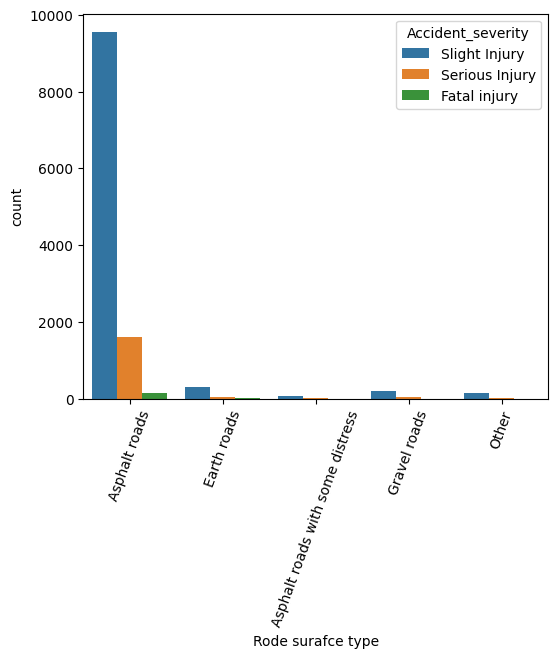

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=data)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=70)
plt.show

In [12]:
data['Time'] = pd.to_datetime(data['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
new_data = data.copy()
new_data['Hour_of_Day'] = new_data['Time'].dt.hour
n_df = new_data.drop('Time', axis=1)
n_df.head()

C:\Users\mohammad\AppData\Local\Temp\ipykernel_1856\4143138774.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [13]:
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']

# new dataframe generated
featureset_df = n_df[features]
target = n_df['Accident_severity']

# create a copy dataframe featureset_df to handle the missing values
feature_df = featureset_df.copy()

In [14]:
# NaN are missing
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

# features information
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

In [15]:
# Categorical features to encode using one hot encoding 
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']

# setting input features X and target y 
X = feature_df[features]  # here features are selected from 'object' datatype
y = n_df['Accident_severity']

# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [18]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_data = pd.DataFrame(X_new, columns=cols)

In [57]:
import numpy as np
from imblearn.over_sampling import SMOTENC

n_cat_index = np.array(range(3,50))
smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_data,y_en)
# print the shape of new upsampled dataset
X_n.shape, y_n.shape
print(y_n.value_counts())

e:\Installed\python\Lib\site-packages\imblearn\over_sampling\_smote\base.py:645: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [59]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

# predicting on test data
predics = rf.predict(X_tst)

# train score 
rf.score(X_trn, y_trn)

NameError: name 'X_n' is not defined

In [60]:
classif_re = classification_report(y_tst,predics)
print(classif_re)

NameError: name 'y_tst' is not defined